In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [8]:
# Data and Functions

data = np.loadtxt('COBE_CMB_data.txt', skiprows=1, delimiter=' ', dtype=float)
freq = data[:, 0] # Hz
Bright = data[:, 1] # (ergs/s/cm^2/sr/Hz)  

h = 6.62607015e-34  # Planck constant in J*s
k = 1.380649e-23    # Boltzmann constant in J/K
c = 2.998e8         # Speed of light in m/s

def blackbody(freq, temp,a):
    return a*((2 * h * freq**3 / c**2) * (1 / (np.exp(h * freq / (k * temp)) - 1)))


[  2.75143777 981.19160177]


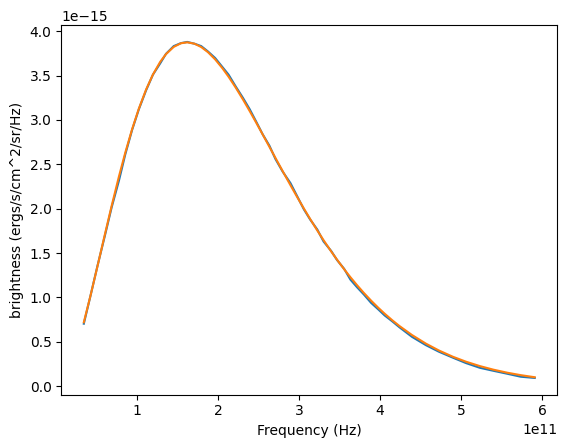

In [9]:
# BlackBody Curve

# Curve Fit
popt, pcov = curve_fit(blackbody, freq, Bright)
print(popt)

plt.clf()
plt.plot(freq, Bright)
plt.plot(data[:,0], blackbody(freq, *popt))
plt.xlabel('Frequency (Hz)')
plt.ylabel('brightness (ergs/s/cm^2/sr/Hz)')
plt.show()

In [10]:
dist = [0.69,1.38,2.06,2.72,3.35,3.96,4.54,5.11,5.62,6.5,6.06,6.87] #kpc

def data(file):
    data = np.loadtxt(file, skiprows=1, delimiter=' ', dtype=float)
    wavelength = data[:, 0] # cm
    Bright = data[:, 1] # (ergs/s/cm^2/sr/Hz)  
    return wavelength, Bright

def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

p0 = [800, 21, 1]

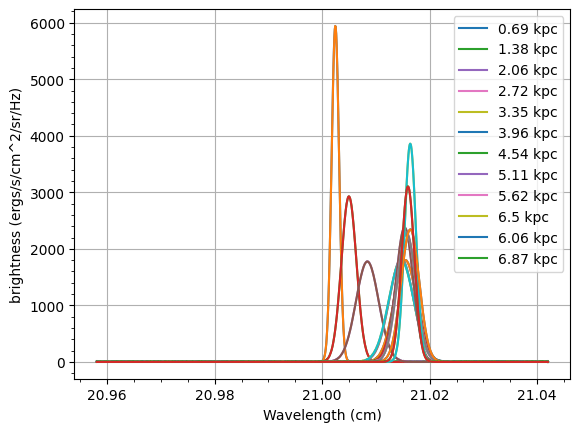

In [14]:
plt.clf()
opt_wavelength = []
for i in dist:
    filename = "../Assign2/galaxy_21cm_spectrum/spectrum_d_"+str(i)+"_kpc.txt"
    popt, pcov = curve_fit(gaussian, data(filename)[0], data(filename)[1], p0=p0) 
    opt_wavelength.append(popt[1])
    plt.plot(data(filename)[0], data(filename)[1], label=str(i)+' kpc' )
    plt.plot(data(filename)[0], gaussian(data(filename)[0], *popt))
    plt.xlabel('Wavelength (cm)')
    plt.ylabel('brightness (ergs/s/cm^2/sr/Hz)')
    plt.legend()
    
plt.grid()
plt.minorticks_on()
plt.show()

In [12]:
opt_wavelength = np.array(opt_wavelength)

velc = (opt_wavelength - 21) / 21 * 3e5

cent_freq = (c/opt_wavelength)*1e-5
print(cent_freq)


[142.745239   142.72810469 142.70478271 142.6617351  142.66197987
 142.65675151 142.65579803 142.65769273 142.65531436 142.65055875
 142.65056253 142.65341511]


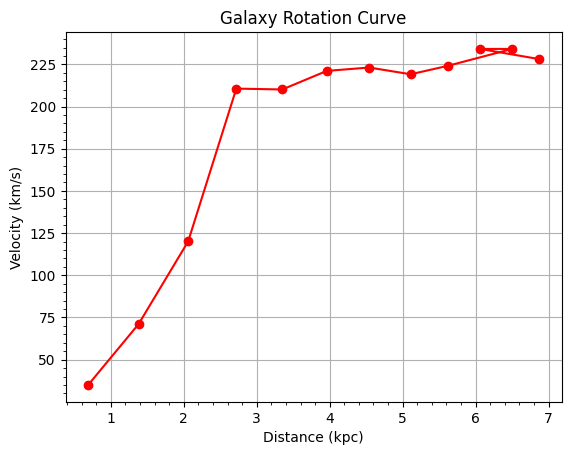

In [13]:
plt.clf()
plt.plot(dist, velc, 'ro-')
plt.xlabel('Distance (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title("Galaxy Rotation Curve")
plt.grid()
plt.minorticks_on()
plt.show()